# MENTORÍA: Predicción de indicadores sociales para países del MERCOSUR

## Práctico 3: Introducción a ML - Aprendizaje Supervisado

[Link a la descripción del proyecto](https://github.com/jfrau/DiploDatos2020/blob/master/README.md)

### Introducción

En este práctico se buscará trabajar el problema de series temporales multivariadas de esta mentoría desde el punto de vista de los algoritmos base de machine learning y Aprendizaje Supervisado. 

Sobre la base de que existen modelos específicamente diseñados para datos en forma de series temporales (los cuales escapan al alcance de los contenidos de la Diplomatura) y que tienen un desempeño bastante robusto, en este práctico nos centraremos no tanto en los resultados de los modelos base sino más bien implementar técnicas y estrategias usuales al momento de atacar problemas y que son bastante comunes en la vida diaria de un Científico de datos.

Estas estrategias se relacionan con:

- Construcción de features.
- Codificación de variables categóricas.
- Redefinición de un problema.
- Implementación y seguimiento de diferentes modelos.
- Análisis de resultados en base a los algoritmos utilizados y la cantidad de datos disponibles.


### Metodología de trabajo

En este práctico se disponibilizan datos de **BRASIL, URUGUAY y PARAGUAY** para algunos indicadores y algunos features en la franja temporal 1990-2018. Los mismos ya fueron curados, con lo cual no contienen ningún dato faltante o no nulo. Este proceso de curación se llevó a cabo teniendo en cuenta features compartidos con ARGENTINA (de la lista resultante del práctico anterior), de manera tal de poder realizar una suerte de "unión" entre los datos.

#### Propuesta

Intentar explicar la variable **Índice de Gini** perteneciente al Indicador Pobreza (planteada como una columna target) utilizando las siguientes variables:

- **Brecha de pobreza a 1,90 por día (2011 PPA)**	(Indicador Pobreza)
- **Tasa de incidencia de la pobreza, sobre la base de 1,90 por día (2011 PPA) (% de la población)** (Indicador Pobreza)
- **Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)** (Indicador Protección Social)
- **Población activa, total** (Indicador Educación)
- **País** (Argentina, Brasil, Uruguay y Paraguay)
- **Año** (Franja temporal 1990-2018)


La propuesta se realiza en base a la posible relación o influencia de las variables de la lista anterior con el Índice de Gini (que intenta representar la inequidad social). Es importante mencionar que dicha elección tiene en cuenta además lo acotado de las bases de datos luego del proceso de curación. 

Sin embargo, dentro de los datasets que se disponibilizan existen otras variables que podrían eventualmente reemplazar a alguna de la lista o incluso a la variable target (siempre que exista una lógica en ello). *Esta es la razón por la que se plantea esta propuesta inicial, la cual puede ser modificada de acuerdo a posibles evaluaciones o decisiones del grupo.*

#### Consideración importante

Como se observará más abajo el dataset que se construye contiene 28x4 (112) filas (28 años en  países sobre 4 países ) y un total de 9 columnas (sin contar la columna target) que desde el punto de vista de modelos de machine learning (sobretodo los más complejos) es considerada poca data.  Aconsejo revisar estos atículos sobre los grados de libertad en modelos de machine learning: [post1](https://machinelearningmastery.com/degrees-of-freedom-in-machine-learning/#:~:text=In%20machine%20learning%2C%20the%20degrees,a%20deep%20learning%20neural%20network.&text=In%20statistics%2C%20degrees%20of%20freedom,used%20to%20calculate%20a%20statistic.), [post2](https://discuss.analyticsvidhya.com/t/significance-of-degree-of-freedom/9127) para profundizar este tema. Esto significa que **agregar más variables y mantener solo 4 países NO es una opción**, a menos que sume otro país.

## Preprocesamiento de los datos

In [11]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

/home/jfrau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### Carga de datos

In [12]:
# Datasets pobreza
pobreza_BRA_1990_2018 = pd.read_csv('pobreza_BRA_1990_2018.csv')
pobreza_URU_1990_2018 = pd.read_csv('pobreza_URU_1990_2018.csv')
pobreza_PAR_1990_2018 = pd.read_csv('pobreza_PAR_1990_2018.csv')


In [13]:
# Datasets protección social
proteccionsocial_BRA_1990_2018 = pd.read_csv('proteccionsocial_BRA_1990_2018.csv')
proteccionsocial_URU_1990_2018 = pd.read_csv('proteccionsocial_URU_1990_2018.csv')
proteccionsocial_PAR_1990_2018 = pd.read_csv('proteccionsocial_PAR_1990_2018.csv')

In [14]:
# Datasets educación
educacion_BRA_1990_2018 = pd.read_csv('educacion_BRA_1990_2018.csv')
educacion_URU_1990_2018 = pd.read_csv('educacion_URU_1990_2018.csv')
educacion_PAR_1990_2018 = pd.read_csv('educacion_PAR_1990_2018.csv')

### Filtro por indicadores

#### Pobreza

In [15]:
codigos_indicadores_pobreza = ['SI.POV.GINI','SI.POV.GAPS','SI.POV.DDAY']
codigos_indicadores_pobreza

['SI.POV.GINI', 'SI.POV.GAPS', 'SI.POV.DDAY']

In [16]:
pobreza_BRA = pobreza_BRA_1990_2018[pobreza_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_URU = pobreza_URU_1990_2018[pobreza_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_PAR = pobreza_PAR_1990_2018[pobreza_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]

In [17]:
pobreza_PAR['Indicator Name'].unique()

array(['Índice de Gini',
       'Brecha de pobreza a $1,90 por día (2011 PPA) (%)',
       'Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'],
      dtype=object)

#### Protección Social

In [18]:
codigos_indicadores_proteccionsocial = ['SL.UEM.TOTL.NE.ZS','SL.TLF.CACT.FM.ZS','SL.TLF.CACT.FM.NE.ZS']
codigos_indicadores_proteccionsocial

['SL.UEM.TOTL.NE.ZS', 'SL.TLF.CACT.FM.ZS', 'SL.TLF.CACT.FM.NE.ZS']

In [19]:
proteccionsocial_BRA = proteccionsocial_BRA_1990_2018[proteccionsocial_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_URU = proteccionsocial_URU_1990_2018[proteccionsocial_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_PAR = proteccionsocial_PAR_1990_2018[proteccionsocial_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]

In [20]:
proteccionsocial_BRA['Indicator Name'].unique()

array(['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)',
       'Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT)',
       'Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)'],
      dtype=object)

In [21]:
proteccionsocial_BRA

,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Brasil,BRA,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",SL.UEM.TOTL.NE.ZS,3.690000,5.055000,6.420000,6.030000,6.225250,6.420500,...,8.522100,7.719550,6.917000,7.185700,6.976400,6.661200,8.426700,11.599900,12.822400,12.333800
5,Brasil,BRA,Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT),SL.TLF.CACT.FM.ZS,50.196931,50.499762,52.370154,54.279407,56.223705,58.200648,...,71.002781,69.959603,68.908161,69.641806,69.637640,69.893991,70.804848,71.184286,72.654804,73.180848
6,Brasil,BRA,Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional),SL.TLF.CACT.FM.NE.ZS,52.051556,52.051556,61.589794,61.858219,60.583450,59.308681,...,71.893508,70.935170,69.976833,69.410888,69.333404,69.637027,70.603539,70.852825,72.463443,73.006388


#### Educación

In [22]:
codigos_indicadores_educacion = ['SL.TLF.TOTL.IN','SE.SEC.ENRL.GC','SE.PRM.CMPT.ZS']
codigos_indicadores_educacion

['SL.TLF.TOTL.IN', 'SE.SEC.ENRL.GC', 'SE.PRM.CMPT.ZS']

In [23]:
educacion_BRA = educacion_BRA_1990_2018[educacion_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_URU = educacion_URU_1990_2018[educacion_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_PAR = educacion_PAR_1990_2018[educacion_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]

In [24]:
educacion_BRA['Indicator Name'].unique()

array(['Población activa, total',
       'Educación de nivel secundario, alumnos en programas de educación general'],
      dtype=object)

In [25]:
educacion_BRA

,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,Brasil,BRA,"Población activa, total",SL.TLF.TOTL.IN,59920078.0,61473096.0,63397868.0,65352451.0,67376427.0,69484734.0,...,95333404.0,95231965.0,95052710.0,97597798.0,98903783.0,99932834.0,101600929.0,102508951.0,104260712.0,105542232.0
5,Brasil,BRA,"Educación de nivel secundario, alumnos en programas de educación general",SE.SEC.ENRL.GC,12130155.0,13971090.0,14960211.0,15322543.0,15799825.0,17332329.0,...,22384267.0,22215054.0,21982889.0,21637503.0,24006493.0,23326279.0,22607924.0,22559870.0,22161547.0,22161547.0


## Construccion del dataset para modelos de supervisado

In [26]:
variables_educacion = ['SL.TLF.TOTL.IN']
variables_proteccionsocial = ['SL.UEM.TOTL.NE.ZS']
variables_pobreza = codigos_indicadores_pobreza

### Variables tomadas de Educación

In [27]:
def generacion_dataset(dataset,lista_indicadores,pais_string):

    dataset = dataset[dataset['Indicator Code'].isin(lista_indicadores)]
    df = dataset.drop(['Country Name', 'Country Code', 'Indicator Code'],axis=1)
    df = df.columns.to_frame().T.append(df, ignore_index=True)
    df.columns = range(len(df.columns))
    df1 = df.T
    df1.columns = df1.iloc[0]
    df1 = df1.drop(df1.index[0])
    df1['Country'] = pais_string
    return df1

In [29]:
df_educacion_PAR = generacion_dataset(educacion_PAR,variables_educacion,'PAR')
df_educacion_BRA = generacion_dataset(educacion_BRA,variables_educacion,'BRA')
df_educacion_URU = generacion_dataset(educacion_URU,variables_educacion,'URU')

In [31]:
educacion = pd.concat([df_educacion_PAR, df_educacion_BRA,df_educacion_URU])
educacion

,Indicator Name,"Población activa, total",Country
1,1990.0,1.7066e+06,PAR
2,1991.0,1.75702e+06,PAR
3,1992.0,1.80544e+06,PAR
4,1993.0,1.86062e+06,PAR
5,1994.0,1.9188e+06,PAR
...,...,...,...
25,2014.0,1.75016e+06,URU
26,2015.0,1.74923e+06,URU
27,2016.0,1.75087e+06,URU
28,2017.0,1.74827e+06,URU


### Variables tomadas de Protección Social

In [32]:
df_psocial_PAR = generacion_dataset(proteccionsocial_PAR,variables_proteccionsocial,'PAR')
df_psocial_BRA = generacion_dataset(proteccionsocial_BRA,variables_proteccionsocial,'BRA')
df_psocial_URU = generacion_dataset(proteccionsocial_URU,variables_proteccionsocial,'URU')

In [36]:
psocial = pd.concat([df_psocial_PAR, df_psocial_BRA,df_psocial_URU])
psocial

,Indicator Name,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country
1,1990.0,5.8,PAR
2,1991.0,5.1,PAR
3,1992.0,4.98,PAR
4,1993.0,5.06,PAR
5,1994.0,4.41,PAR
...,...,...,...
25,2014.0,6.5474,URU
26,2015.0,7.4879,URU
27,2016.0,7.8406,URU
28,2017.0,7.8896,URU


### Variables tomadas de Pobreza

In [37]:
pobreza_PAR = generacion_dataset(pobreza_PAR,variables_pobreza,'PAR')
pobreza_BRA = generacion_dataset(pobreza_BRA,variables_pobreza,'BRA')
pobreza_URU = generacion_dataset(pobreza_URU,variables_pobreza,'URU')

In [40]:
pobreza_BRA.head()

,Indicator Name,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Country
1,1990.0,60.5,8.7,21.6,BRA
2,1991.0,56.85,8.9,21.25,BRA
3,1992.0,53.2,9.1,20.9,BRA
4,1993.0,60.1,8.6,19.9,BRA
5,1994.0,59.85,6.95,16.45,BRA


In [41]:
pobreza = pd.concat([pobreza_PAR,pobreza_BRA,pobreza_URU])
pobreza

,Indicator Name,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Country
1,1990.0,40.8,0.3,1.2,PAR
2,1991.0,44.28,1.3,3.44,PAR
3,1992.0,47.76,2.3,5.68,PAR
4,1993.0,51.24,3.3,7.92,PAR
5,1994.0,54.72,4.3,10.16,PAR
...,...,...,...,...,...
25,2014.0,40.1,0,0.1,URU
26,2015.0,40.1,0,0.1,URU
27,2016.0,39.7,0,0.1,URU
28,2017.0,39.5,0,0.1,URU


In [45]:
dfmer1 = pd.merge(educacion, pobreza, on=["Country",'Indicator Name'])
df_final = dfmer1.merge(psocial,on=["Country",'Indicator Name'])
df_final

,Indicator Name,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
0,1990.0,1.7066e+06,PAR,40.8,0.3,1.2,5.8
1,1991.0,1.75702e+06,PAR,44.28,1.3,3.44,5.1
2,1992.0,1.80544e+06,PAR,47.76,2.3,5.68,4.98
3,1993.0,1.86062e+06,PAR,51.24,3.3,7.92,5.06
4,1994.0,1.9188e+06,PAR,54.72,4.3,10.16,4.41
...,...,...,...,...,...,...,...
82,2014.0,1.75016e+06,URU,40.1,0,0.1,6.5474
83,2015.0,1.74923e+06,URU,40.1,0,0.1,7.4879
84,2016.0,1.75087e+06,URU,39.7,0,0.1,7.8406
85,2017.0,1.74827e+06,URU,39.5,0,0.1,7.8896


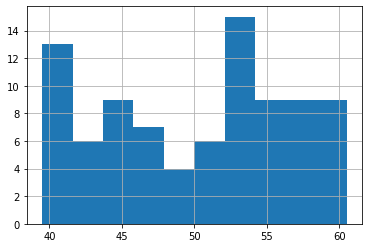

In [53]:
#Distribución índice de Gini
df_final['Índice de Gini'].hist()

## CONSIGNAS

#### Preparación de los datos

1. Agregar la información de ARGENTINA al dataset anterior en base a lo obtenido en el Práctico de Análisis y Curación.
2. Convertir la columna Country en una variable dummy y codificar la columna Year (Los siguientes links pueden ser útiles: [Link1](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/), [Link2](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159), [Link3](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)). 
3. Construir un segundo dataset con datos normalizados usando *StandardScaler* o *MinMaxScaler* de la librería scikit-learn por ejemplo (las columnas Country y Year no se normalizan). En este punto la elección es libre pero sería interesante ver el efecto de la normalización sobre la distribución de los datos de forma similar a lo realizado en este [post](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).


#### Modelado

##### Parte I

Una parte esencial del proceso de modelado (y en realidad de todo experimento científico) es llevar a cabo un *seguimiento* de todas las pruebas realizadas de manera tal de no "perder resultados" (con la consecuencia de tener que repetir experimentos ya realizados) y poder llevar un registro de que tanto se mejoró/empeoró. 

Para llevar a cabo esto disponemos de una herramienta llamada [mlflow](https://mlflow.org/) que nos permite llevar el trackeo de todo el proceso de una manera simple y rápida, además de poder guardar información que consideremos relevante. Así, la primer consigna de esta sección es **entender y setear la herramienta, instalando mlflow si es necesario, de manera tal que todo experimento que se pruebe a partir de este momento quede registrado y pueda recuperarse**. En este [link](https://github.com/PiConsulting/Pensadero/tree/master/Eventos/2020/2020-03-06_wids_mlflow) encontrarán una implementación simple con mflow de la cual pueden guiarse.

##### Parte II

1. Realizar la partición del dataset en conjunto de entrenamiento y test. ¿Son las distribuciones de los datos similares en ambos conjuntos? Si la respuesta es no, ¿qué decisión tomarían?.
2. Probar modelos de *regresión lineal* y *polinomial* (elegir al menos dos grados diferentes) sobre los **datos sin normalizar**. ¿Cómo son los errores sobre el conjunto de entrenamiento y sobre el conjunto de test? Analizar los resultados.
3. Probar algún modelo del tipo *árbol de decisión/random forest* para problemas de regresión también sobre los **datos sin normalizar**. Extraer y estudiar el feature importance. Análizar la performance de estos modelos y comparar con los resultados del punto 2 (**Sabemos que esto va a dar muy mal por la poca cantidad de datos!**).
4. Repetir los pasos 2 y 3 sobre el **dataset normalizado**: ¿Cambian los resultados? ¿Se observa alguna diferencia en performance? ¿Algo para destacar?.
5. A modo de práctica recuperar algún resultado usando mlflow. Nota: Se recomienda guardar las métricas obtenidas, modelos, tipo de algoritmo probado (y por qué no los dataset usados). 
6. Escribir conclusiones finales analizando los problemas al momento de modelar un dataset reducido (¿Qué rol cumple el overfitting en este caso?)

## Presentación de resultados

Realizar un informe en formato notebook en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañeros de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de las materias "Introdución al Aprendizaje Automático" y "Aprendizaje Supervisado". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.

Fecha de entrega: 25/09/2020